In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
#from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn  as sns
import re
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
#import ggplot as gg
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#from collections import Counter

In [2]:
#saving directories
os.listdir("../data")

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'Bar graph is used to identify the frequency of categorical variable.docx',
 'Correlation_plot.png',
 'date.PNG',
 'dayvsfare.png',
 'decision.PNG',
 'decision_tree.PNG',
 'distance_fare.png',
 'dropoff_latitudeVSfare.png',
 'dropoff_latitude_frequency.png',
 'dropoff_longitudeVsfare.png',
 'dropoff_longitude_frequency.png',
 'fare_amount vs hour.png',
 'fare_amount vs year.png',
 'fare_amount_frequency.png',
 'frequency_distance.png',
 'Linear.PNG',
 'linear_regression.PNG',
 'mape.PNG',
 'missing_percantage.PNG',
 'month_vs_fare.png',
 'mycode.ipynb',
 'Mycode.R',
 'mycodeinR.txt',
 'outlier_analysis1.PNG',
 'outlier_analysis2.PNG',
 'outlier_analysis3.PNG',
 'outlier_analysis4.PNG',
 'outlier_analysis5.PNG',
 'outlier_analysis6.PNG',
 'passenger_count_frequency.png',
 'passenger_fare.png',
 'pickup_latitude_frequency.png',
 'pickup_latVSfare.png',
 'pickup_longitude_frequecy.png',
 'pickup_longVsFare.png',
 'Project Name.docx',
 'rand

In [3]:
#load data
cab_train=pd.read_csv("train_cab.csv")
cab_test=pd.read_csv("test.csv")
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
#fare_amount           object
#pickup_datetime       object
#pickup_longitude     float64
#pickup_latitude      float64
#dropoff_longitude    float64
#dropoff_latitude     float64
#passenger_count      float64
cab_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [6]:
#convert fare_amount from categorical to numerical
cab_train["fare_amount"] = pd.to_numeric(cab_train["fare_amount"],errors='coerce')
cab_train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [7]:
########Missing value analyis__________________________________________________________________________
missing_val=pd.DataFrame(cab_train.isnull().sum())
#reset index
missing_val=missing_val.reset_index()
#renaming
missing_val=missing_val.rename(columns={'index':'variables',0:'Missing_percentage'})
#calculate percentage
missing_val['Missing_percentage']=(missing_val['Missing_percentage']/len(cab_train))*100
#put in order
missing_val=missing_val.sort_values('Missing_percentage',ascending=False).reset_index(drop=True)

In [8]:
#imputation Method
cab_train['passenger_count'].loc[38]
#cab_train['passenger_count'].loc[38]=np.nan
#mean 2.6248591593279618
#median 1
#KNN 1.4


6.0

In [9]:
#mean
#cab_train['passenger_count']=cab_train['passenger_count'].fillna(cab_train['passenger_count'].mean())
#median
#cab_train['passenger_count']=cab_train['passenger_count'].fillna(cab_train['passenger_count'].median())
#Apply KNN imputation algorithm
#marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

cab_train.isnull().sum()


fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [10]:
#remove null values
cab_train=cab_train.dropna()

In [11]:
cab_train.shape


(15987, 7)

In [12]:
##Latitude range -90 to 90
cab_train.describe()#max 401

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15987.000000,15987.000000,15987.000000,15987.000000,15987.000000,15987.000000
mean,15.030232,-72.464447,39.915627,-72.464005,39.898725,2.623170
std,431.200458,10.573270,6.828818,10.569932,6.186185,60.890237
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992143,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981693,40.752603,-73.980168,40.753557,1.000000
75%,12.500000,-73.966819,40.767353,-73.963644,40.768005,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
## The fare amount column is having some negative values or zero,
for i in range(0, len(cab_train)):
    if(cab_train['fare_amount'].iloc[i]<=0):
        cab_train['fare_amount'].iloc[i]=np.nan
        #passenger_count must be between 1 and 6
    if(cab_train['passenger_count'].iloc[i]>6 or cab_train['passenger_count'].iloc[i]<1):
        cab_train['passenger_count'].iloc[i]=np.nan
        #Pickup latitude range -90 to 90
    if(cab_train['pickup_latitude'].iloc[i]<(-90) or cab_train['pickup_latitude'].iloc[i]>90):
        cab_train['pickup_latitude'].iloc[i]=np.nan
cab_train.isnull().sum()
cab_train=cab_train.dropna() 

C:\Users\PranjalJain\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
def convert_datetime(df):
    df["pickup_datetime"] = df["pickup_datetime"].map(lambda x: str(x)[:-3])
    df["year"] = df["pickup_datetime"].map(lambda x: x[0:4])
    df["month"] =df["pickup_datetime"].map(lambda x: x[5:7])
    df["date"] = df["pickup_datetime"].map(lambda x: x[8:10])
    df["hour"] = df["pickup_datetime"].map(lambda x: x[11:13])
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format='%Y-%m-%d')
    #df['weekday'] = df.pickup_datetime.dt.weekday
    df['weekday']=df["pickup_datetime"].dt.weekday_name
convert_datetime(cab_train)

In [15]:
cab_train=cab_train.drop(['pickup_datetime'],axis=1)

In [16]:
cab_train.shape

(15905, 11)

In [17]:
########Missing value analyis__________________________________________________________________________
missing_val=pd.DataFrame(cab_train.isnull().sum())
#reset index
missing_val=missing_val.reset_index()
#renaming
missing_val=missing_val.rename(columns={'index':'variables',0:'Missing_percentage'})
cab_train=cab_train.dropna()

In [18]:
#outlier Analysis_________________________________________
df=cab_train.copy()
#cab_train = df.copy()
#save numeric names
cnames =  ["fare_amount", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

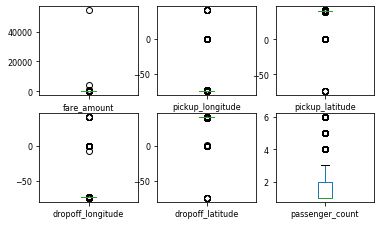

In [19]:
#Check for outliers until they are completely removed from the code

cab_train.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [20]:
 # #Detect and delete outliers from data
for i in range(0,6):
    print(cab_train.shape)
    for i in cnames:    
        q75, q25 = np.percentile(cab_train.loc[:,i], [75 ,25])
        iqr = q75 - q25
        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        cab_train = cab_train.drop(cab_train[cab_train.loc[:,i] < min].index)
        cab_train = cab_train.drop(cab_train[cab_train.loc[:,i] > max].index)
    #Detect and delete outliers for passenger_count min should be 1 max should be 6
    q75, q25 = np.percentile(cab_train['passenger_count'], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    cab_train = cab_train.drop(cab_train[cab_train['passenger_count']< 1].index)
    cab_train = cab_train.drop(cab_train[cab_train['passenger_count']> 6].index)
    cab_train.shape

(15904, 11)
(13148, 11)
(12555, 11)
(12336, 11)
(12221, 11)
(12219, 11)


In [21]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000
mean,7.967366,-73.981964,40.753005,-73.981389,40.753382,1.648989
std,3.017323,0.015605,0.020256,0.015911,0.020795,1.267520
min,2.500000,-74.018108,40.699363,-74.019535,40.698502,1.000000
25%,5.500000,-73.992696,40.739151,-73.992034,40.739429,1.000000
50%,7.500000,-73.982722,40.753609,-73.982202,40.754512,1.000000
75%,10.000000,-73.971843,40.766438,-73.971480,40.766790,2.000000
max,16.200000,-73.940567,40.807297,-73.940792,40.807827,6.000000


Text(0, 0.5, 'Frequency')

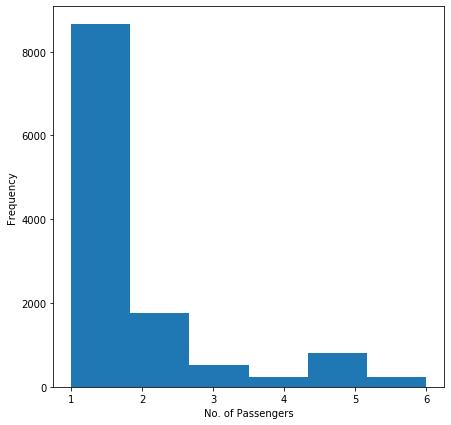

In [22]:
#Histogram Plot of passenger_count Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['passenger_count'],bins=6)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

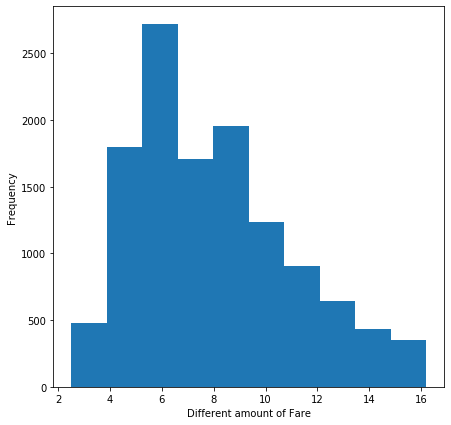

In [23]:
#Histogram Plot of fareamount Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['fare_amount'])
plt.xlabel('Different amount of Fare')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

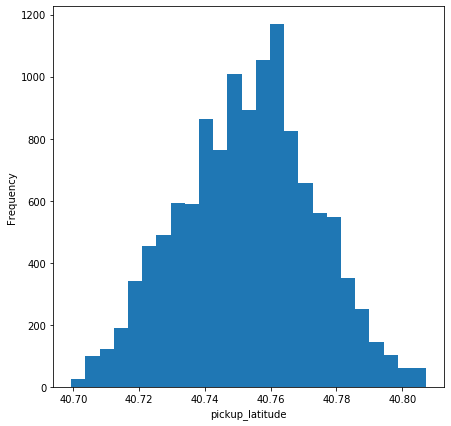

In [24]:
#Histogram Plot of pickup_latitude Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['pickup_latitude'],bins=25)
plt.xlabel('pickup_latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

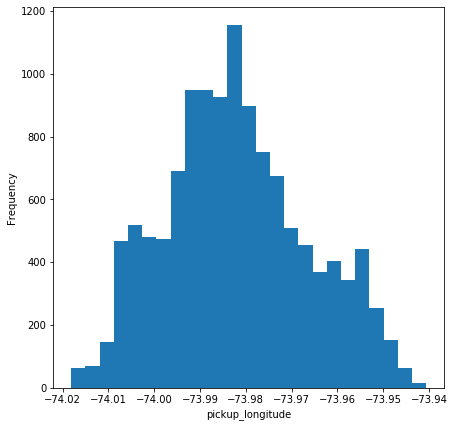

In [25]:
#Histogram Plot of pickup_longitude Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['pickup_longitude'],bins=25)
plt.xlabel('pickup_longitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

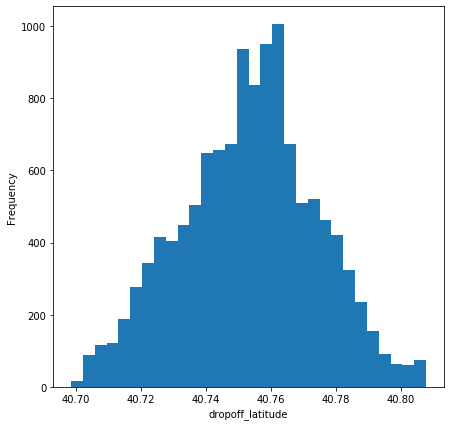

In [26]:
#Histogram Plot of dropoff_latitude Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['dropoff_latitude'],bins=30)
plt.xlabel('dropoff_latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

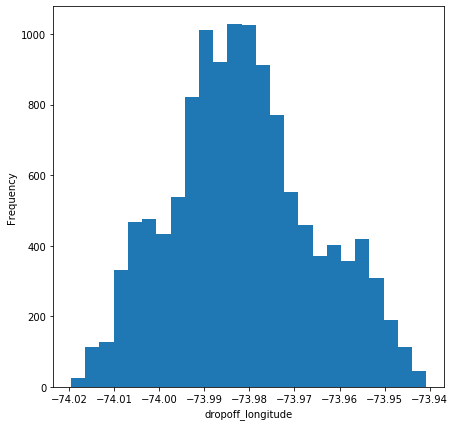

In [27]:
#Histogram Plot of dropoff_longitude Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['dropoff_longitude'],bins=25)
plt.xlabel('dropoff_longitude')
plt.ylabel('Frequency')

### Feature Selection

In [28]:
cnames=["fare_amount", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude","passenger_count"]
cnames

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [29]:
##Correlation analysis
#Correlation plot
df_corr = cab_train.loc[:,cnames]

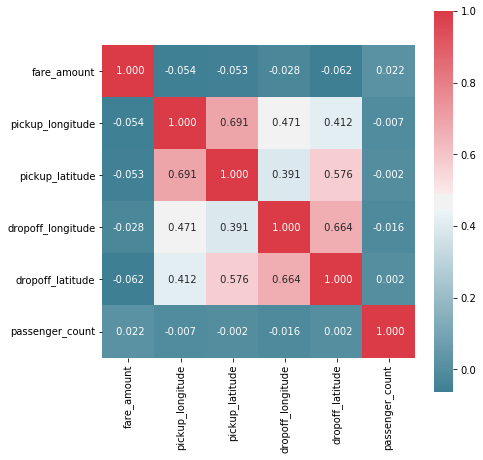

In [30]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot= True,fmt = " .3f", cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [31]:
from scipy.stats import chi2_contingency
#Chisquare test of independence
#Save categorical variables
cat_names = ["year", "month", "hour", "weekday", "date"]

#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(cab_train['fare_amount'], cab_train[i]))
    print(p)

year
0.0
month
6.187136568195433e-05
hour
6.64446987089005e-05
weekday
0.3943241861627226
date
0.14597964709291117


In [32]:
#since p-value of weekday(.3943) and date(0.1459) is greater than 0.05 ,we can remove them
cab_train=cab_train.drop(['weekday','date'],axis=1)

In [33]:
cab_train= cab_train.astype({"fare_amount":float,"pickup_longitude":float,"pickup_latitude":float,"dropoff_longitude":float,"dropoff_latitude":float,"passenger_count":int,"year":int,"month":int,"hour":int})

In [34]:
cab_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                   int32
month                  int32
hour                   int32
dtype: object

Algorithm


In [35]:
#Import Libraries for decision tree
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
#split the cab_train data
#X=cab_train.loc[:,cab_train.columns != 'fare_amount']
#Y=cab_train['fare_amount']
cab_train_train,cab_train_test = train_test_split(cab_train, test_size=0.2)
Y_Train=cab_train_train.iloc[:,0]
X_train=cab_train_train.iloc[:,1:9]
X_test=cab_train_test.iloc[:,1:9]
Y_test=cab_train_test.iloc[:,0]


In [37]:
#from sklearn.linear_model import LinearRegression
#ols = LinearRegression()
#ols_model = ols.fit(X_train, Y_Train)
#y_pred_test = ols_model.predict(X_test)
import statsmodels.api as sm
model=sm.OLS(Y_Train,X_train).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              8829.
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                        0.00
Time:                        15:26:40   Log-Likelihood:                         -24509.
No. Observations:                9775   AIC:                                  4.903e+04
Df Residuals:                    9767   BIC:                                  4.909e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -8.5424      2.294     -3.723      0.000     -13.040      -4.045
pickup_latitude       0.5280      2.068      0.255      0.798      -3.526       4.582
dropoff_longitude     8.5609      2.308      3.710      0.000       4.037      13.085
dropoff_latitude    -11.1606      2.028     -5.504      0.000     -15.136      -7.186
passenger_count       0.0558      0.024      2.345      0.019       0.009       0.102
year                  0.2199      0.016     13.608      0.000       0.188       0.252
month                 0.0303      0.009      3.454      0.001       0.013       0.048
hour                  0.0080      0.005      1.681      0.093      -0.001       0.017
==============================================================================
Omnibus:                      583.342   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              679.554
Skew:                           0.636   Prob(JB):                    2.73e-148
Kurtosis:                       2.780   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Calculate MAPE
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape


In [40]:
Prediction_LR=model.predict(X_test)
MAPE(Y_test,Prediction_LR)#34.76870905446957

36.07283587679911

In [41]:
###### DecisionTree Modelling ##########
def DT(depth):
    dt = tree.DecisionTreeRegressor( max_depth = depth)
    dt_model = dt.fit(X_train, Y_Train)
    y_pred = dt_model.predict(X_test)
    print('depth : {} ----  Decision Tree MAPE: {}'.format(depth,MAPE(Y_test,y_pred)))
    
for depth in [1,2,5,10,20,30,40,50]:
    DT(depth)

depth : 1 ----  Decision Tree MAPE: 36.21358395567267
depth : 2 ----  Decision Tree MAPE: 35.98769010909725
depth : 5 ----  Decision Tree MAPE: 33.085601058490845
depth : 10 ----  Decision Tree MAPE: 28.219662595478283
depth : 20 ----  Decision Tree MAPE: 26.168156276067506
depth : 30 ----  Decision Tree MAPE: 27.231206026694426
depth : 40 ----  Decision Tree MAPE: 26.986118938200658
depth : 50 ----  Decision Tree MAPE: 27.119248283060116


In [42]:
dt = tree.DecisionTreeRegressor(max_depth =20)
dt_model=dt.fit(X_train,Y_Train)
dt_pred = dt_model.predict(X_test)

In [43]:
MAPE(Y_test,dt_pred)#24.119185801347378

26.219676230678257

In [44]:
from sklearn.ensemble import RandomForestRegressor
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, Y_Train)
    y_pred = rf_model.predict(X_test)
    print('depth : {}, n_estimators : {}  ---- Random Forest Regression MAPE: {}'.format(depth, n_est,MAPE(Y_test,y_pred)))  

for n_est in [100, 200]:
    for depth in [2, 5, 10 , 20, 30]:
        train_RF(n_est, depth)

depth : 2, n_estimators : 100  ---- Random Forest Regression MAPE: 35.01463006243811
depth : 5, n_estimators : 100  ---- Random Forest Regression MAPE: 32.021092479554945
depth : 10, n_estimators : 100  ---- Random Forest Regression MAPE: 25.48452323163933
depth : 20, n_estimators : 100  ---- Random Forest Regression MAPE: 19.510082363206134
depth : 30, n_estimators : 100  ---- Random Forest Regression MAPE: 18.99535140974475
depth : 2, n_estimators : 200  ---- Random Forest Regression MAPE: 35.11316663190597
depth : 5, n_estimators : 200  ---- Random Forest Regression MAPE: 31.840770940058533
depth : 10, n_estimators : 200  ---- Random Forest Regression MAPE: 25.549272501820347
depth : 20, n_estimators : 200  ---- Random Forest Regression MAPE: 19.49701206305693
depth : 30, n_estimators : 200  ---- Random Forest Regression MAPE: 18.87657862721305


In [45]:
rf_model = RandomForestRegressor(max_depth=30, n_estimators = 200).fit(X_train,Y_Train)
rf_pred = rf_model.predict(X_test)

In [46]:
MAPE(Y_test,rf_pred)#18.27075369978842

18.92473217229968

TEST DATA


In [47]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [48]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [49]:
########Missing value analyis__________________________________________________________________________
missing_val=pd.DataFrame(cab_test.isnull().sum())
#reset index
missing_val=missing_val.reset_index()
#renaming
missing_val=missing_val.rename(columns={'index':'variables',0:'Missing_percentage'})
#calculate percentage
missing_val['Missing_percentage']=(missing_val['Missing_percentage']/len(cab_test))*100
#put in order
missing_val=missing_val.sort_values('Missing_percentage',ascending=False).reset_index(drop=True)
cab_test.isnull().sum()


pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [50]:
## The fare amount column is having some negative values or zero,
for i in range(0, len(cab_test)):
        #passenger_count must be between 1 and 6
    if(cab_test['passenger_count'].iloc[i]>6 or cab_test['passenger_count'].iloc[i]<1):
        cab_test['passenger_count'].iloc[i]=np.nan
        #Pickup latitude range -90 to 90
    if(cab_test['pickup_latitude'].iloc[i]<(-90) or cab_test['pickup_latitude'].iloc[i]>90):
        cab_test['pickup_latitude'].iloc[i]=np.nan
cab_test.isnull().sum()
cab_test=cab_test.dropna() 

In [51]:
cab_test.shape


(9914, 6)

In [52]:
#convert datetime into seperate variable
convert_datetime(cab_test)
cab_test=cab_test.drop(['pickup_datetime'],axis=1)

In [53]:
cab_test=cab_test.dropna()
cab_test.shape

(9914, 10)

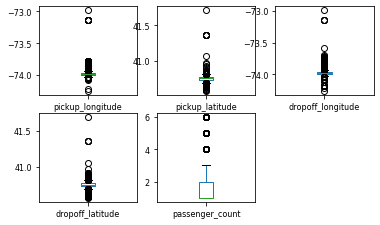

In [54]:
#outlier Analysis_________________________________________
df=cab_test.copy()
#cab_train = df.copy()
#save numeric names
cnames =  [ "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

#Check for outliers until they are completely removed from the code

cab_test.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [55]:
 # #Detect and delete outliers from data
for i in range(0,6):
    print(cab_test.shape)
    for i in cnames:    
        q75, q25 = np.percentile(cab_test.loc[:,i], [75 ,25])
        iqr = q75 - q25
        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        cab_test = cab_test.drop(cab_test[cab_test.loc[:,i] < min].index)
        cab_test = cab_test.drop(cab_test[cab_test.loc[:,i] > max].index)
    #Detect and delete outliers for passenger_count min should be 1 max should be 6
    q75, q25 = np.percentile(cab_test['passenger_count'], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    cab_test = cab_test.drop(cab_test[cab_test['passenger_count']< 1].index)
    cab_test = cab_test.drop(cab_test[cab_test['passenger_count']> 6].index)
    cab_test.shape

(9914, 10)
(8603, 10)
(8473, 10)
(8459, 10)
(8456, 10)
(8456, 10)


Text(0, 0.5, 'Frequency')

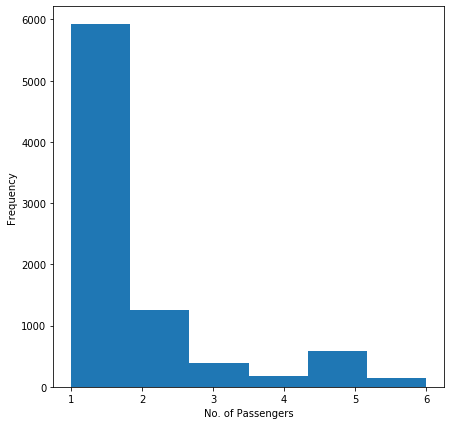

In [56]:
#Histogram Plot of passenger_count Column
plt.figure(figsize=(7,7))
plt.hist(cab_test['passenger_count'],bins=6)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

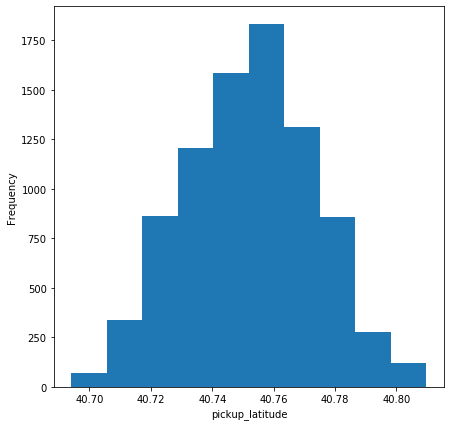

In [57]:
#Histogram Plot of fareamount Column
plt.figure(figsize=(7,7))
plt.hist(cab_test['pickup_latitude'])
plt.xlabel('pickup_latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

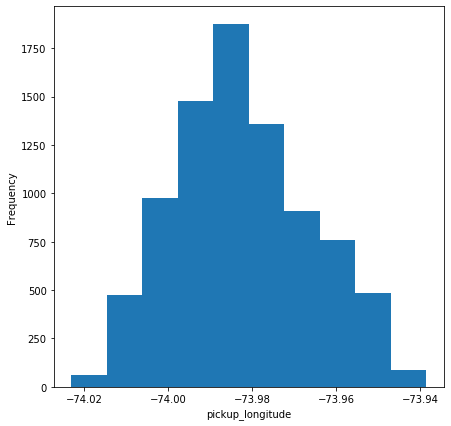

In [58]:
#Histogram Plot of fareamount Column
plt.figure(figsize=(7,7))
plt.hist(cab_test['pickup_longitude'])
plt.xlabel('pickup_longitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

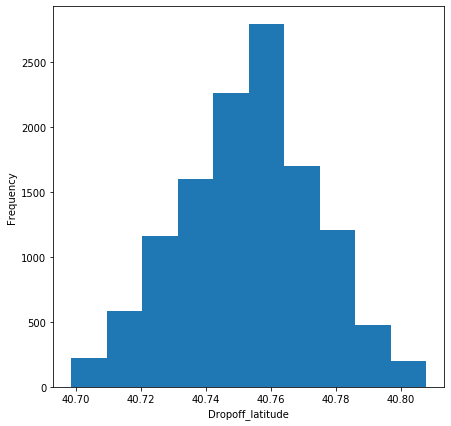

In [59]:
#Histogram Plot of fareamount Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['dropoff_latitude'])
plt.xlabel('Dropoff_latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

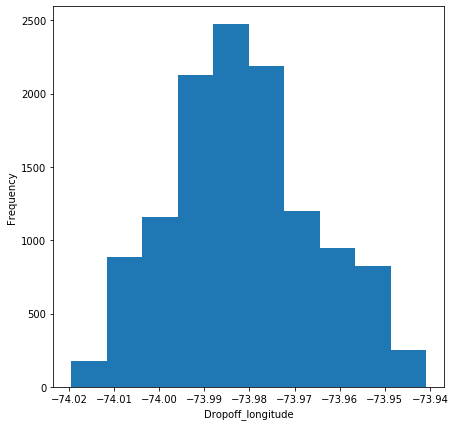

In [60]:
#Histogram Plot of fareamount Column
plt.figure(figsize=(7,7))
plt.hist(cab_train['dropoff_longitude'])
plt.xlabel('Dropoff_longitude')
plt.ylabel('Frequency')

In [61]:
cab_test=cab_test.drop(['weekday','date'],axis=1)

In [62]:
cab_test.shape

(8456, 8)

In [63]:
cab_test= cab_test.astype({"pickup_longitude":float,"pickup_latitude":float,"dropoff_longitude":float,"dropoff_latitude":float,"passenger_count":int,"year":int,"month":int,"hour":int})

Apply Random Forest

In [64]:
cabfinal_pred = dt_model.predict(cab_test)
#Convert our results to submission and then to a csv file
cab_test["fare_amount"] = cabfinal_pred

In [65]:
cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,6.833333
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,9.000000
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,6.234225
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,8.638710
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,12.900000


In [66]:
cab_test.to_csv("submission.csv")